---
# Esercitazione 5
---

## Algoritmo di Metropolis
In questa esercitazione si vuole utilizzare l'algoritmo di Metropolis per campionare la densità di probabilità dell'elettrone di un atomo d'idrogeno. Di seguito viene dunque riportata una breve spiegazione di questo algoritmo di campionamento. $\\$
Metropolis è un algoritmo di campionamento basato su Random Walk e Catene di Markov; esso è in grado di campionare una data pdf, senza essere a conoscenza della sua normalizzazione in quanto si basa sul rapporto tra probabilità. $\\$
L'algoritmo di Metropolis si riassume come segue:
- Parto da un punto $x_1$ casuale
- Genero $x_2$ tramite una funzione di transizione $T(x_1|x_2)$
- Calcolo la probabilità di accettazione $\alpha := A(x_1,x_2)=min{1,\frac{T(x_1|x_2) \cdot p(x_2)}{T(x_2|x_1) \cdot p(x_1)}} \quad \in [0,1]$
- Genero un numero casuale $r \in [0,1]$ da distribuzione uniforme
- Se $r \leq \alpha$ accetto il valore $x_2$ proposto, che quindi diventa il nuovo punto di partenza, altrimenti la nuova partenza resta $x_1$
- Ripeto, fino ad equilibrare il sistema

La velocità di equilibrazione dipende dalla scelta della distribuzione di transizione $T$, da cui dipende quindi anche l'efficienza. Dopo aver equilibrato l'algoritmo, il set di variabili stocastiche successivamente ottenuto ${x_i}$ segue la distribuzione $p(x)$ desiderata.

L'algoritmo necessita di un'equilibrazione preliminare in quanto il campionamento ottenuto coincide con quello corretto solo asintoticamente. Inoltre, non è garantito si inizi da un "buon" punto di partenza, ovvero in cui la pdf è più probabile. Infatti, supponendo di partire da un punto in una zona poco probabile spesso accadrà che $p(x_2)>p(x_1)$, dunque la probabilità di accettazione verrebbe molto elevata; la distribuzione sarebbe quindi identica a quella di $T$. Un buon punto di partenza potrebbe dunque essere il massimo della pdf. $\\$
Un'altra accortezza dell'algoritmo riguarda la scelta della distribuzione di transizione $T$, specialmente dei parametri che la definiscono. Essa, infatti, non deve corrispondere a distanze tra valori troppo distanti, altrimenti finirei in zone della pdf a bassa probabilità, ottenendo dunque un alto numero di accettazioni. Non può neanche collegare punti troppo vicini, altrimenti avrei dati troppo correlati e sarei lento a campionare tutto lo spazio delle fasi. Si osservi che queste correlazioni tra dati non rendono valido il teorema del limite centrale; L'incertezza statistica va perciò stimata solamente tramite datablocking. $\\$
Per ovviare questo problema, una scelta empirica è impostare i parametri di $T$ in modo che, sempre dopo equilibrizzazione, il valore di accettazione sia circa del $50\%$.

In questa esercitazione verranno utilizzate due probabilità di transizione, una uniforme e una gaussiana. Si osservi che nel caso uniforme si ha che $T(x_1,x_2)=T(x_2,x_1)$, quindi la probabilità di accettazione dipende unicamente dal rapporto tra le probabilità.

## Esercizio 05.1 - Atomo di idrogeno
Come preannunciato, in questa esercitazione si utilizzerà l'algoritmo di Metropolis per il campionamento della distribuzione di densità di probabilità dell'elettrone di un atomo di idrogeno. L'autofunzione d'onda dell'elettrone nel livello fondamentale (Ground State) è data da:

$$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} 
$$

Mentre per uno dei tre stati eccitati nel livello $2p$ vale:

$$
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)
$$ 

dove $a_0=4\pi\epsilon_0\hbar^2/m_e e^2=0.0529$ nm è il raggio di Bohr. $\\$
L'obiettivo è verificare i seguenti valori di aspettazione: $\\$
$\bullet \left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0 $ $\\$  
$\bullet \left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0$

dove le rispettive densità di probabilità sono date da $|\Psi_{1,0,0}(x,y,z)|^2$ e $|\Psi_{2,1,0}(x,y,z)|^2$. L'esercizio è diviso in due punti, ognuno riguarda un utilizzo differente dell'algoritmo di Metropolis. Ogni analisi è effettuata svolgendo $10^6$ simulazioni, trovando prima il giusto numero di passi per equilibrare il sistema e trovando poi i giusti parametri $\delta$ che garantiscono un valore di accettazione di circa il $50 \%$.

### Primo punto - Probabilità di Transizione uniforme
Nel primo punto si utilizza una probabilità di transizione $T(\vec{x}|\vec{y})$ uniforme tra due posizioni successive $\vec{x},\vec{y}$, ovvero uniforme tra $[\vec{r}_{old}-\vec{\delta} ; \vec{r}_{old}+\vec{\delta}]$. Il parametro $\vec{\delta}=\delta \cdot (1,1,1)$ è fissato in modo che faccia ottenere un valore di accettazione nell'algoritmo di Metropolis pari a circa il $50\%$ $\textit{dopo} l'equilibrazione$. Per prima cosa si procede dunque a mostrare l'andamento delle variabili $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ e $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ ottenuti, in unità di raggio di Bohr, durante la fase di equilibrazione, per capire quanti step sono necessari e se il valore di partenza iniziale è stato scelto in modo adeguato. Di seguito si mostra l'importanza della posizione iniziale dell'algoritmo per quanto riguarda la velocità di equilibrazione. Metropolis deve infatti iniziare in prossimità del massimo della densità di probabilità, per aumentarne il campionamento. Per lo stato GS il valore ottimale utilizzato sarà quindi $\vec{r} = (x,y,z)=(0,0,0)$, mentre per lo stato $2p$ sarà $(x,y,z)=(0,0,2)$. Infatti, in coordinate sferiche $\cos(\theta)=z/r$, si nota dunque che il piano $z=0$ annulla la funzione distribuzione di probabilità: è dunque un minimo. Dal calcolo del gradiente della pdf, per $z \neq 0$ la condizione di massimo si ottiene per $x=y=0$ e $z=2$. $\\$
Per mostrare cosa accade fuori da questi intorni, si procede ad analizzare le medie delle posizioni delle due pdf a partire dalla posizione $(100,0,0)$, svolgendo $10^4$ step e dividendo le medie in $100$ blocchi (quindi da $100$ dati per blocco). Come valore di $\delta$ sono stati presi $1.223$ e $2.98$ per GS e 2p rispettivamente; questi hanno permesso di ottenere un valore di accettazione dopo lequilibrio di circa il $50\%$.

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# carico i valori delle medie cumulative delle posizioni
pos_gs, err_pos_gs = np.loadtxt("./dati_unif_lontano/Posizioni_eq_gs_unif.txt", unpack= True, usecols=(0,1), skiprows=1)
pos_2p, err_pos_2p = np.loadtxt("./dati_unif_lontano/Posizioni_eq_2p_unif.txt", unpack= True, usecols=(0,1), skiprows=1)

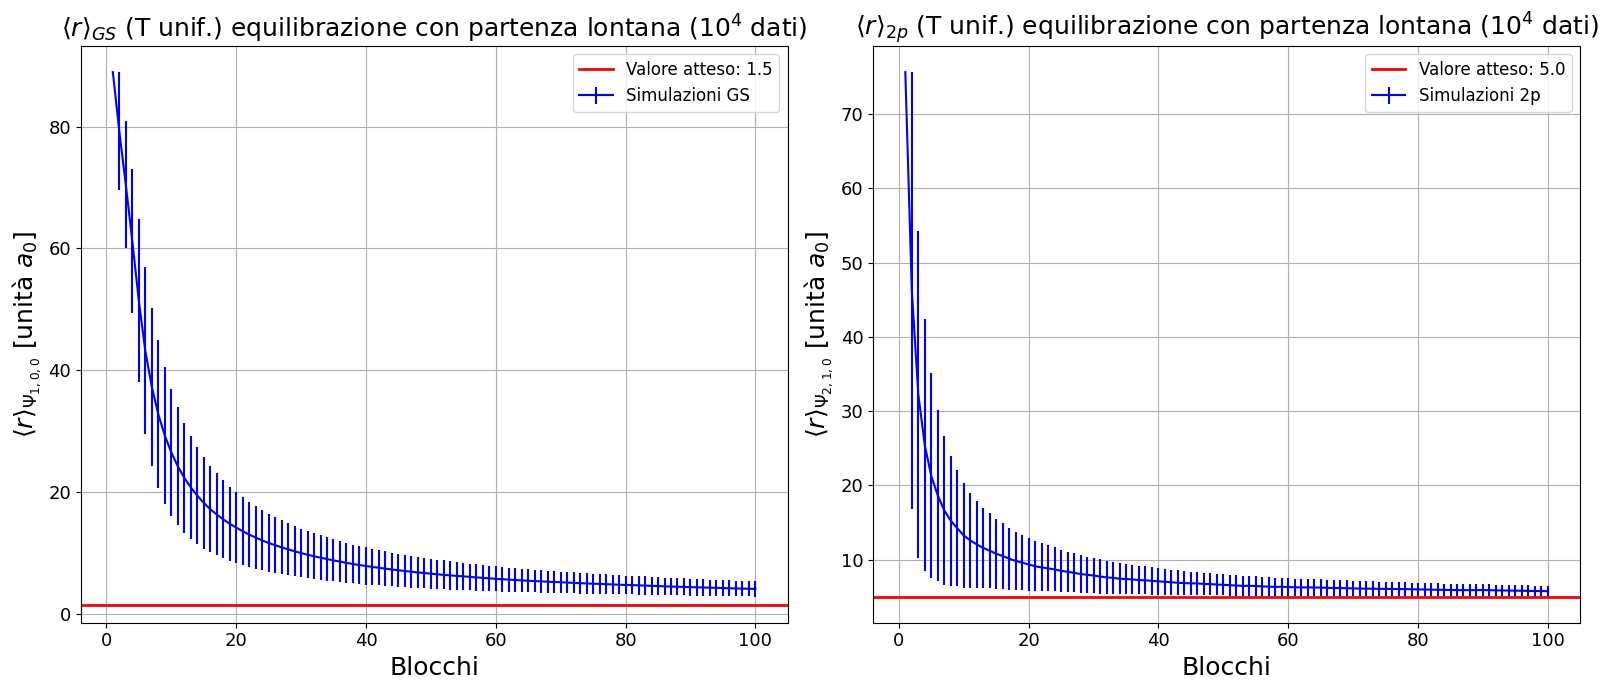

Posizione media GS (Transizione uniforme):  4.063 +\- 1.248
Livello di confidenza con il valore atteso:  2.05 sigma


Posizione media 2p (Transizione uniforme):  5.778 +\- 0.72
Livello di confidenza con il valore atteso:  1.08 sigma


In [17]:
N_blocks = len(pos_gs) # numero blocchi

# x del grafico, numero di lanci totali incrementando ogni volta il numero di blocchi
x = np.arange(1, N_blocks+1)     # numero blocchi

plt.figure(figsize=(16,7))

##################################
# Plot delle due accettazioni
plt.subplot(1,2,1)
plt.title(r"$\langle r \rangle_{GS}$ (T unif.) equilibrazione con partenza lontana ($10^4$ dati)", fontsize=18)
plt.errorbar(x, pos_gs, yerr=err_pos_gs, label = "Simulazioni GS", color = 'blue') #plotto la media cumulativa dell'accettazione
plt.xlabel(r"Blocchi", fontsize=18)
plt.ylabel(r"$\left\langle r \right\rangle_{\Psi_{1,0,0}}$ [unità $a_{0}$]", fontsize=18)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.axhline(y=1.5, xmin=0, xmax=1, label=f'Valore atteso: 1.5', lw = 2, color = 'red')
plt.legend(loc='upper right', prop={'size': 12})

plt.grid(True)
plt.tight_layout() # per ridurre lo spazio bianco intorno

######################################
plt.subplot(1,2,2)
plt.title(r"$\langle r \rangle_{2p}$ (T unif.) equilibrazione con partenza lontana ($10^4$ dati)", fontsize=18)
plt.errorbar(x, pos_2p, yerr=err_pos_2p, label = "Simulazioni 2p", color = 'blue')
plt.xlabel(r"Blocchi", fontsize=18)
plt.ylabel(r"$\left\langle r \right\rangle_{\Psi_{2,1,0}}$ [unità $a_{0}$]", fontsize=18)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.axhline(y=5., xmin=0, xmax=1, label=f'Valore atteso: 5.0', lw = 2, color = 'red')
plt.legend(loc='upper right', prop={'size': 12})

plt.grid(True)
plt.tight_layout()

plt.show()

print("Posizione media GS (Transizione uniforme): ", round(pos_gs[-1],3), "+\-", round(err_pos_gs[-1],3))
print("Livello di confidenza con il valore atteso: ",np.abs(round((pos_gs[-1] - 1.5)/err_pos_gs[-1],2)), "sigma")
print("\n")

print("Posizione media 2p (Transizione uniforme): ", round(pos_2p[-1],3), "+\-", round(err_pos_2p[-1],3))
print("Livello di confidenza con il valore atteso: ",np.abs(round((pos_2p[-1] - 5.)/err_pos_2p[-1],2)), "sigma")

Nonostante il valore di accettazione sia stato circa del $50\%$ anche in questa fase (e si ricordi che non è fondamentale che lo sia qui), partendo da una posizione lontana dal massimo si può notare che l'algoritmo impiega tutte le $10^4$ mosse a disposizione per avvicinarsi al valor medio atteso. Si nota quanto precedentemente descritto: l'andamento della variabile media sembra un'esponenziale descrescente,  infatti per distanze molto elevate l'accettazione è quasi sempre del $100\%$. $\\$
Si può anche osservare che partire da posizioni lontane necessita per forza di un periodo di equilibrazione, in quanto il valor medio della posizione all'inizio è sicuramente molto elevato. $\\$
Nonostante ciò, vengono di seguito riportati i risultati della media subito dopo questi $10^4$ valori di equilibrazione e avvicinamento al centro della distribuzione. I risultati riportano $10^6$ step successivi, in cui la media della posizione è divisa in $100$ blocchi.

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# carico i valori delle medie cumulative delle posizioni
pos_gs, err_pos_gs = np.loadtxt("./dati_unif_lontano/Posizioni_gs_unif.txt", unpack= True, usecols=(0,1), skiprows=1)
pos_2p, err_pos_2p = np.loadtxt("./dati_unif_lontano/Posizioni_2p_unif.txt", unpack= True, usecols=(0,1), skiprows=1)

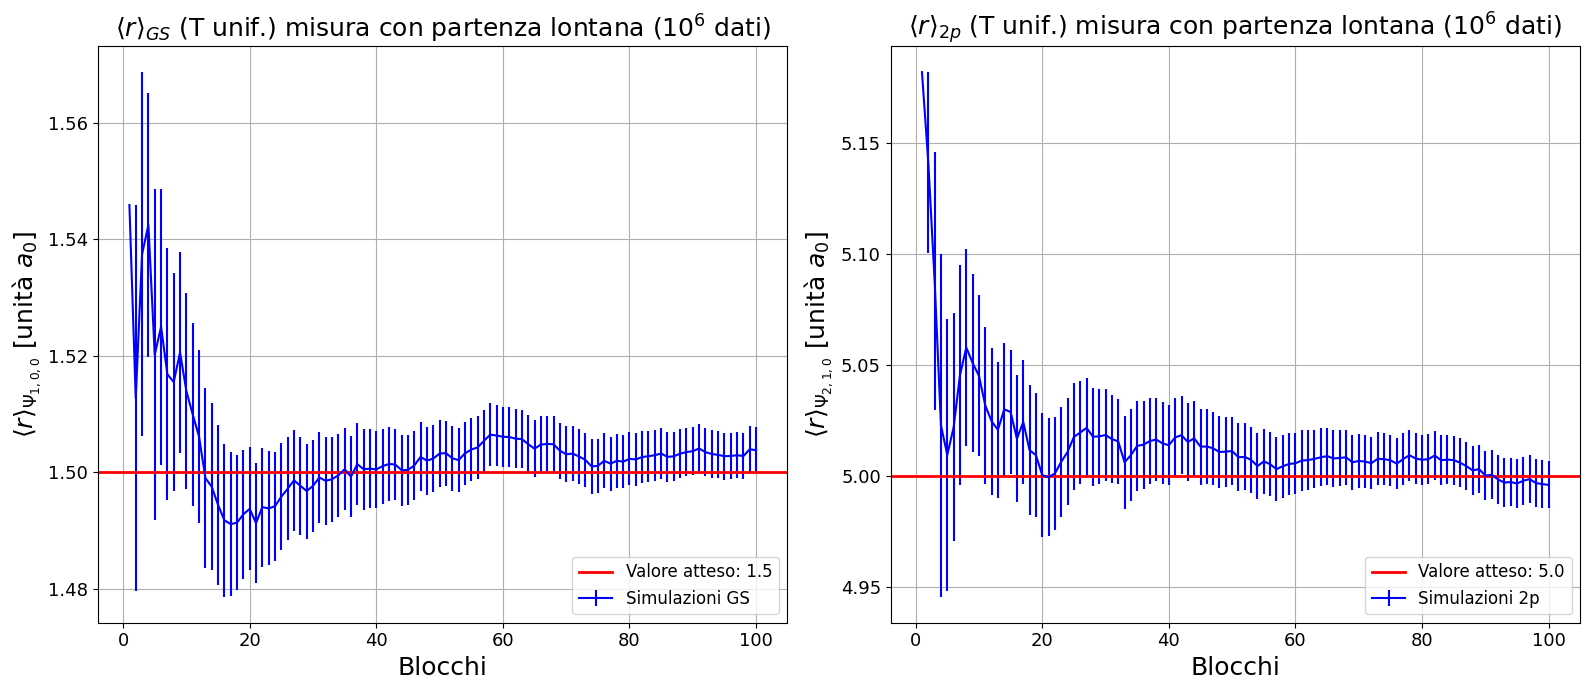

Posizione media GS (Transizione uniforme):  1.504 +\- 0.004
Livello di confidenza con il valore atteso:  0.95 sigma


Posizione media 2p (Transizione uniforme):  4.996 +\- 0.011
Livello di confidenza con il valore atteso:  0.38 sigma


In [19]:
N_blocks = len(pos_gs) # numero blocchi

# x del grafico, numero di lanci totali incrementando ogni volta il numero di blocchi
x = np.arange(1, N_blocks+1)     # numero blocchi

plt.figure(figsize=(16,7))

##################################
# Plot delle due accettazioni
plt.subplot(1,2,1)
plt.title(r"$\langle r \rangle_{GS}$ (T unif.) misura con partenza lontana ($10^6$ dati)", fontsize=18)
plt.errorbar(x, pos_gs, yerr=err_pos_gs, label = "Simulazioni GS", color = 'blue') #plotto la media cumulativa dell'accettazione
plt.xlabel(r"Blocchi", fontsize=18)
plt.ylabel(r"$\left\langle r \right\rangle_{\Psi_{1,0,0}}$ [unità $a_{0}$]", fontsize=18)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.axhline(y=1.5, xmin=0, xmax=1, label=f'Valore atteso: 1.5', lw = 2, color = 'red')
plt.legend(loc='lower right', prop={'size': 12})

plt.grid(True)
plt.tight_layout() # per ridurre lo spazio bianco intorno

######################################
plt.subplot(1,2,2)
plt.title(r"$\langle r \rangle_{2p}$ (T unif.) misura con partenza lontana ($10^6$ dati)", fontsize=18)
plt.errorbar(x, pos_2p, yerr=err_pos_2p, label = "Simulazioni 2p", color = 'blue')
plt.xlabel(r"Blocchi", fontsize=18)
plt.ylabel(r"$\left\langle r \right\rangle_{\Psi_{2,1,0}}$ [unità $a_{0}$]", fontsize=18)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.axhline(y=5., xmin=0, xmax=1, label=f'Valore atteso: 5.0', lw = 2, color = 'red')
plt.legend(loc='lower right', prop={'size': 12})

plt.grid(True)
plt.tight_layout()

plt.show()

print("Posizione media GS (Transizione uniforme): ", round(pos_gs[-1],3), "+\-", round(err_pos_gs[-1],3))
print("Livello di confidenza con il valore atteso: ",np.abs(round((pos_gs[-1] - 1.5)/err_pos_gs[-1],2)), "sigma")
print("\n")

print("Posizione media 2p (Transizione uniforme): ", round(pos_2p[-1],3), "+\-", round(err_pos_2p[-1],3))
print("Livello di confidenza con il valore atteso: ",np.abs(round((pos_2p[-1] - 5.)/err_pos_2p[-1],2)), "sigma")

Da questi step successivi l'equilibrazione è possibile notare che le due distribuzioni si stabilizzano intorno al valore atteso. Notare anche che i valor medi iniziali elevati della posizione indicano che l'equilibrazione non era completa. $\\$
I valori di accettazione precisi di questo run Metropolis sono stati di $0.501$ e $0.500$ rispettivamente per GS e 2p, con li stessi valori di $\delta$ prima riportati.

Il primo punto di questa esercitazione potrebbe finire qui, avendo verificato i valor medi attesi delle distribuzioni. Per completezza si procede a mostrare i risultati analoghi ma partendo dalle posizioni che massimizzano le rispettive distribuzioni: rispettivamente $(0,0,0)$ e $(0,0,2)$ per GS e 2p; sempre con $10^6$ step divisi in $100$ blocchi, salvati dopo un'equilibrazione di $10^4$ step, e utilizzando li stessi valori di $\delta$.

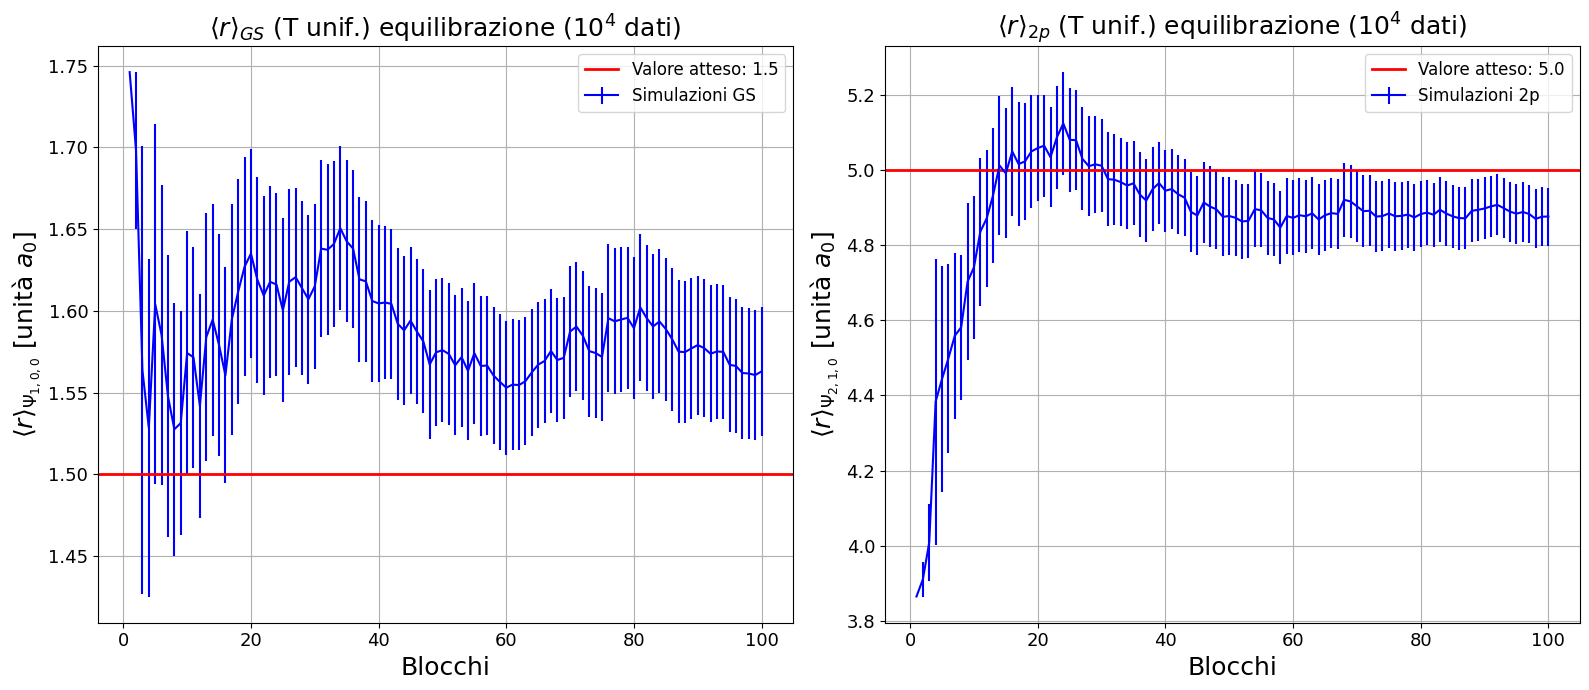

Posizione media GS (Transizione uniforme):  1.563 +\- 0.039
Livello di confidenza con il valore atteso:  1.6 sigma


Posizione media 2p (Transizione uniforme):  4.876 +\- 0.077
Livello di confidenza con il valore atteso:  1.61 sigma


In [20]:
import matplotlib.pyplot as plt
import numpy as np

# carico i valori delle medie cumulative delle posizioni
pos_gs, err_pos_gs = np.loadtxt("./dati_unif/Posizioni_eq_gs_unif.txt", unpack= True, usecols=(0,1), skiprows=1)
pos_2p, err_pos_2p = np.loadtxt("./dati_unif/Posizioni_eq_2p_unif.txt", unpack= True, usecols=(0,1), skiprows=1)
N_blocks = len(pos_gs) # numero blocchi

# x del grafico, numero di lanci totali incrementando ogni volta il numero di blocchi
x = np.arange(1, N_blocks+1)     # numero blocchi

plt.figure(figsize=(16,7))

##################################
# Plot delle due accettazioni
plt.subplot(1,2,1)
plt.title(r"$\langle r \rangle_{GS}$ (T unif.) equilibrazione ($10^4$ dati)", fontsize=18)
plt.errorbar(x, pos_gs, yerr=err_pos_gs, label = "Simulazioni GS", color = 'blue') #plotto la media cumulativa dell'accettazione
plt.xlabel(r"Blocchi", fontsize=18)
plt.ylabel(r"$\left\langle r \right\rangle_{\Psi_{1,0,0}}$ [unità $a_{0}$]", fontsize=18)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.axhline(y=1.5, xmin=0, xmax=1, label=f'Valore atteso: 1.5', lw = 2, color = 'red')
plt.legend(loc='upper right', prop={'size': 12})

plt.grid(True)
plt.tight_layout() # per ridurre lo spazio bianco intorno

######################################
plt.subplot(1,2,2)
plt.title(r"$\langle r \rangle_{2p}$ (T unif.) equilibrazione ($10^4$ dati)", fontsize=18)
plt.errorbar(x, pos_2p, yerr=err_pos_2p, label = "Simulazioni 2p", color = 'blue')
plt.xlabel(r"Blocchi", fontsize=18)
plt.ylabel(r"$\left\langle r \right\rangle_{\Psi_{2,1,0}}$ [unità $a_{0}$]", fontsize=18)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.axhline(y=5., xmin=0, xmax=1, label=f'Valore atteso: 5.0', lw = 2, color = 'red')
plt.legend(loc='upper right', prop={'size': 12})

plt.grid(True)
plt.tight_layout()

plt.show()

print("Posizione media GS (Transizione uniforme): ", round(pos_gs[-1],3), "+\-", round(err_pos_gs[-1],3))
print("Livello di confidenza con il valore atteso: ",np.abs(round((pos_gs[-1] - 1.5)/err_pos_gs[-1],2)), "sigma")
print("\n")

print("Posizione media 2p (Transizione uniforme): ", round(pos_2p[-1],3), "+\-", round(err_pos_2p[-1],3))
print("Livello di confidenza con il valore atteso: ",np.abs(round((pos_2p[-1] - 5.)/err_pos_2p[-1],2)), "sigma")

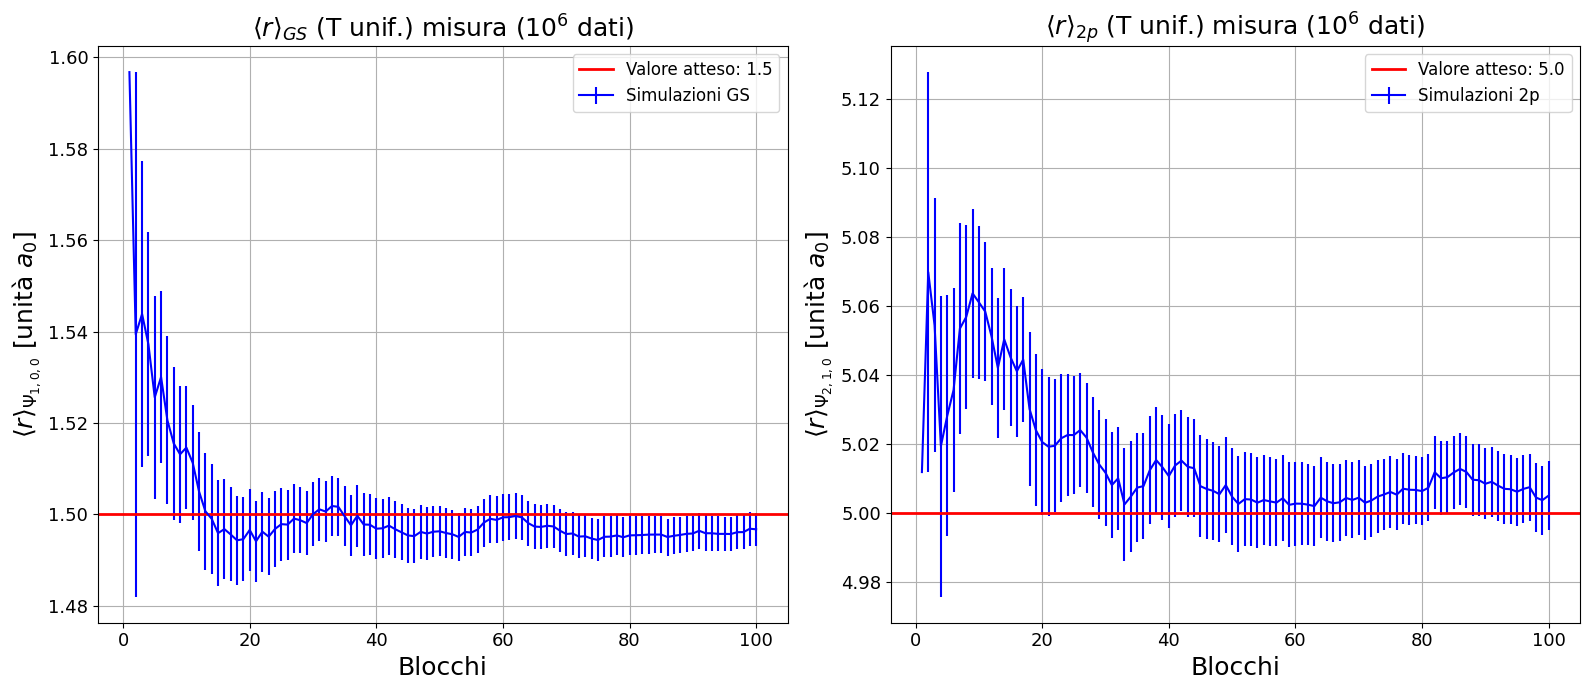

Posizione media GS (Transizione uniforme):  1.497 +\- 0.004
Livello di confidenza con il valore atteso:  0.88 sigma


Posizione media 2p (Transizione uniforme):  5.005 +\- 0.01
Livello di confidenza con il valore atteso:  0.5 sigma


In [21]:
import matplotlib.pyplot as plt
import numpy as np

# carico i valori delle medie cumulative delle posizioni
pos_gs, err_pos_gs = np.loadtxt("./dati_unif/Posizioni_gs_unif.txt", unpack= True, usecols=(0,1), skiprows=1)
pos_2p, err_pos_2p = np.loadtxt("./dati_unif/Posizioni_2p_unif.txt", unpack= True, usecols=(0,1), skiprows=1)
N_blocks = len(pos_gs) # numero blocchi

# x del grafico, numero di lanci totali incrementando ogni volta il numero di blocchi
x = np.arange(1, N_blocks+1)     # numero blocchi

plt.figure(figsize=(16,7))

##################################
# Plot delle due accettazioni
plt.subplot(1,2,1)
plt.title(r"$\langle r \rangle_{GS}$ (T unif.) misura ($10^6$ dati)", fontsize=18)
plt.errorbar(x, pos_gs, yerr=err_pos_gs, label = "Simulazioni GS", color = 'blue') #plotto la media cumulativa dell'accettazione
plt.xlabel(r"Blocchi", fontsize=18)
plt.ylabel(r"$\left\langle r \right\rangle_{\Psi_{1,0,0}}$ [unità $a_{0}$]", fontsize=18)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.axhline(y=1.5, xmin=0, xmax=1, label=f'Valore atteso: 1.5', lw = 2, color = 'red')
plt.legend(loc='upper right', prop={'size': 12})

plt.grid(True)
plt.tight_layout() # per ridurre lo spazio bianco intorno

######################################
plt.subplot(1,2,2)
plt.title(r"$\langle r \rangle_{2p}$ (T unif.) misura ($10^6$ dati)", fontsize=18)
plt.errorbar(x, pos_2p, yerr=err_pos_2p, label = "Simulazioni 2p", color = 'blue')
plt.xlabel(r"Blocchi", fontsize=18)
plt.ylabel(r"$\left\langle r \right\rangle_{\Psi_{2,1,0}}$ [unità $a_{0}$]", fontsize=18)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.axhline(y=5., xmin=0, xmax=1, label=f'Valore atteso: 5.0', lw = 2, color = 'red')
plt.legend(loc='upper right', prop={'size': 12})

plt.grid(True)
plt.tight_layout()

plt.show()

print("Posizione media GS (Transizione uniforme): ", round(pos_gs[-1],3), "+\-", round(err_pos_gs[-1],3))
print("Livello di confidenza con il valore atteso: ",np.abs(round((pos_gs[-1] - 1.5)/err_pos_gs[-1],2)), "sigma")
print("\n")

print("Posizione media 2p (Transizione uniforme): ", round(pos_2p[-1],3), "+\-", round(err_pos_2p[-1],3))
print("Livello di confidenza con il valore atteso: ",np.abs(round((pos_2p[-1] - 5.)/err_pos_2p[-1],2)), "sigma")

Quasi paradossalmente, il risultato ottenuto non si discosta di molto da quello con posizione inziale lontana. Ciò può indicare che la velocità di convergenza è abbastanza elevata da garantire la correttezza dei risultati anche fino al valore scelto a distanza $20$. Se fossimo partiti da una distanza molto maggiore, ad esempio $1000$, i risultati sarebbero stati molto diversi, rendendo necessaria un'equilibrazione maggiore.

### Secondo punto - Probabilità di Transizione gaussiana
Nel secondo punto si utilizza una probabilità di transizione $T(\vec{x}|\vec{y})$ tra due posizioni successive $\vec{x},\vec{y}$ gaussiana. La posizione campionata allo step successivo è ottenuta estraendo tre coordinate $x, y, z$ distribuite ognuna secondo una gaussiana, centrata nel valore della coordinata allo step precedente e con una varianza pari a $\delta^2$. Anche in questo caso il valore di $\delta$ è scelto in modo da rendere l'accettazione il più vicina possibile al $50\%$. Per le due funzioni d'onda GS e $2p$ i valori trovati per $\delta$ sono rispettivamente $0.873$ e $1.371$, ovvero rispetto al caso uniforme il campionamento dev'essere eseguito con step più brevi (i valori trovati erano infatti rispettivamente $1.223$ e $2.980$). La posizione iniziale utilizzata nell'algoritmo è analoga a quella utilizata in precedenza. $\\$

Di seguito vengono riportati i valor medi delle posizioni $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ e $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ ottenuti, in unità di raggio di Bohr.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# carico i valori delle medie cumulative delle posizioni
pos_gs, err_pos_gs = np.loadtxt("./dati_gauss/Posizioni_eq_gs_gauss.txt", unpack= True, usecols=(0,1), skiprows=1)
pos_2p, err_pos_2p = np.loadtxt("./dati_gauss/Posizioni_eq_2p_gauss.txt", unpack= True, usecols=(0,1), skiprows=1)

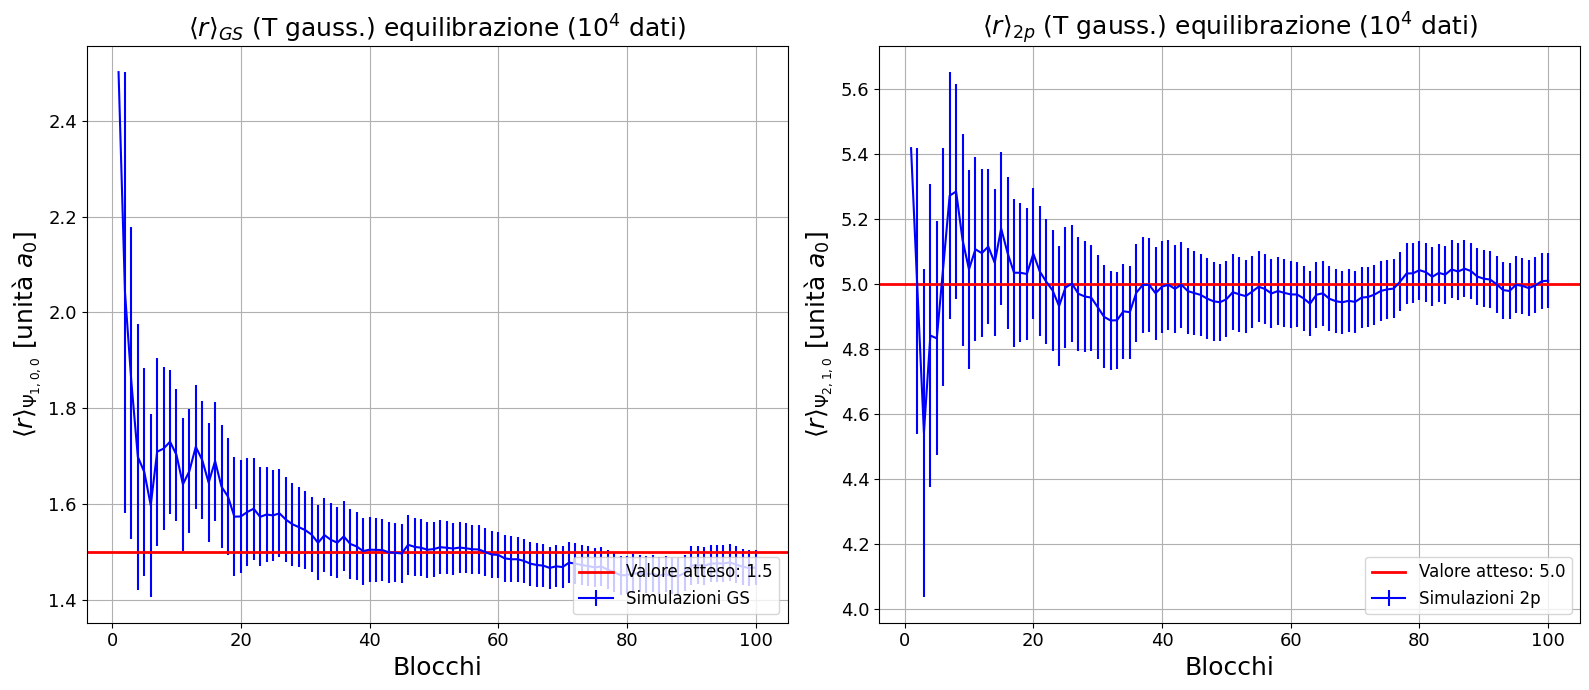

Posizione media GS (Transizione gaussiana):  1.467 +\- 0.037
Livello di confidenza con il valore atteso:  0.89 sigma


Posizione media 2p (Transizione gaussiana):  5.01 +\- 0.085
Livello di confidenza con il valore atteso:  0.12 sigma


In [2]:
N_blocks = len(pos_gs) # numero blocchi

# x del grafico, numero di lanci totali incrementando ogni volta il numero di blocchi
x = np.arange(1, N_blocks+1)     # numero blocchi

plt.figure(figsize=(16,7))

##################################
# Plot delle due accettazioni
plt.subplot(1,2,1)
plt.title(r"$\langle r \rangle_{GS}$ (T gauss.) equilibrazione ($10^4$ dati)", fontsize=18)
plt.errorbar(x, pos_gs, yerr=err_pos_gs, label = "Simulazioni GS", color = 'blue') #plotto la media cumulativa dell'accettazione
plt.xlabel(r"Blocchi", fontsize=18)
plt.ylabel(r"$\left\langle r \right\rangle_{\Psi_{1,0,0}}$ [unità $a_{0}$]", fontsize=18)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.axhline(y=1.5, xmin=0, xmax=1, label=f'Valore atteso: 1.5', lw = 2, color = 'red')
plt.legend(loc='lower right', prop={'size': 12})

plt.grid(True)
plt.tight_layout() # per ridurre lo spazio bianco intorno

######################################
plt.subplot(1,2,2)
plt.title(r"$\langle r \rangle_{2p}$ (T gauss.) equilibrazione ($10^4$ dati)", fontsize=18)
plt.errorbar(x, pos_2p, yerr=err_pos_2p, label = "Simulazioni 2p", color = 'blue')
plt.xlabel(r"Blocchi", fontsize=18)
plt.ylabel(r"$\left\langle r \right\rangle_{\Psi_{2,1,0}}$ [unità $a_{0}$]", fontsize=18)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.axhline(y=5., xmin=0, xmax=1, label=f'Valore atteso: 5.0', lw = 2, color = 'red')
plt.legend(loc='lower right', prop={'size': 12})

plt.grid(True)
plt.tight_layout()

plt.show()

print("Posizione media GS (Transizione gaussiana): ", round(pos_gs[-1],3), "+\-", round(err_pos_gs[-1],3))
print("Livello di confidenza con il valore atteso: ",np.abs(round((pos_gs[-1] - 1.5)/err_pos_gs[-1],2)), "sigma")
print("\n")

print("Posizione media 2p (Transizione gaussiana): ", round(pos_2p[-1],3), "+\-", round(err_pos_2p[-1],3))
print("Livello di confidenza con il valore atteso: ",np.abs(round((pos_2p[-1] - 5.)/err_pos_2p[-1],2)), "sigma")

Si può notare che anche nel caso di campionamento gaussiano la fase di equilibrazione dura qualche centinaia di step. $\\$
Analogamente a prima, di seguito viene mostrato l'andamento della posizione media dopo equilibrazione, effettuando sempre $10^6$ step e dividendo i dati in $100$ blocchi.

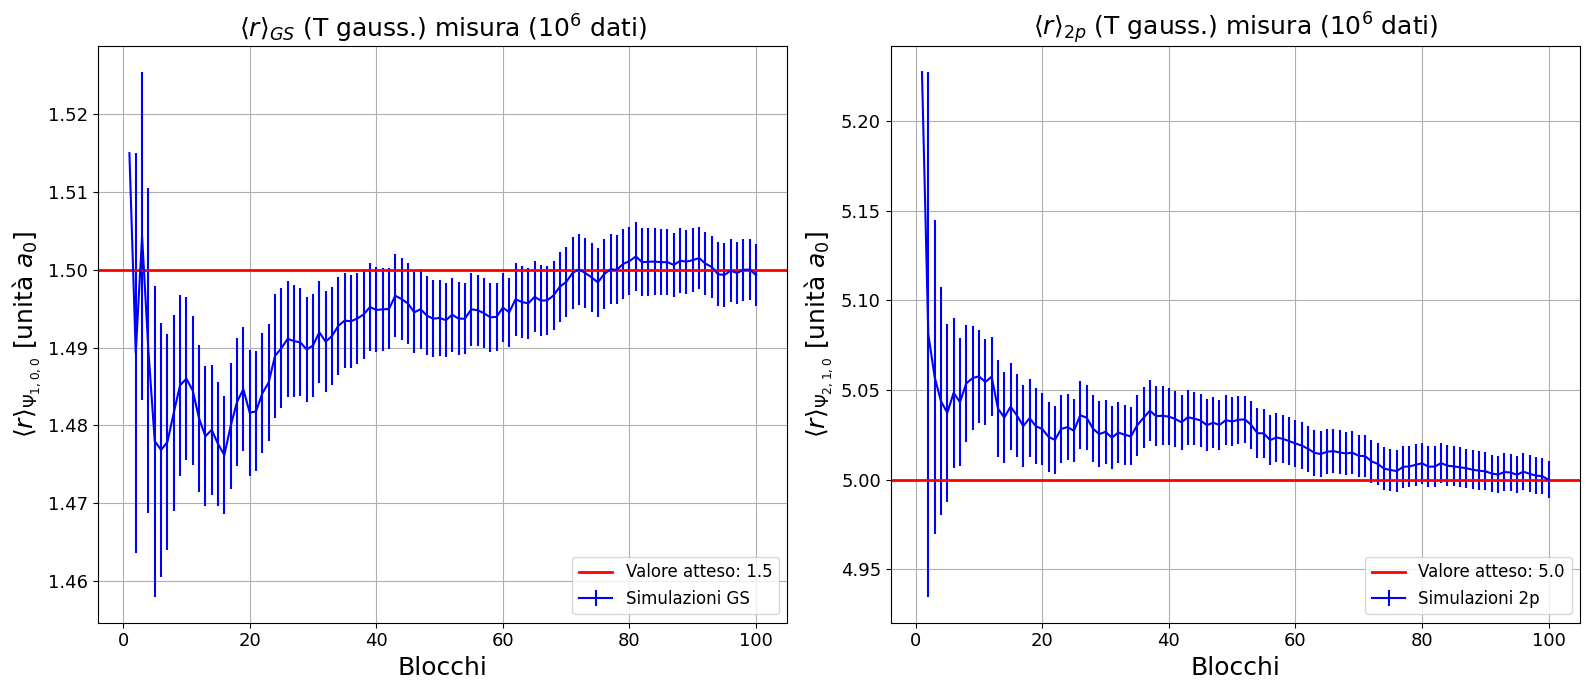

Posizione media GS (Transizione gaussiana):  1.499 +\- 0.004
Livello di confidenza con il valore atteso:  0.17 sigma


Posizione media 2p (Transizione gaussiana):  5.0 +\- 0.01
Livello di confidenza con il valore atteso:  0.01 sigma


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# carico i valori delle medie cumulative delle posizioni
pos_gs, err_pos_gs = np.loadtxt("./dati_gauss/Posizioni_gs_gauss.txt", unpack= True, usecols=(0,1), skiprows=1)
pos_2p, err_pos_2p = np.loadtxt("./dati_gauss/Posizioni_2p_gauss.txt", unpack= True, usecols=(0,1), skiprows=1)
N_blocks = len(pos_gs) # numero blocchi

# x del grafico, numero di lanci totali incrementando ogni volta il numero di blocchi
x = np.arange(1, N_blocks+1)     # numero blocchi

plt.figure(figsize=(16,7))

##################################
# Plot delle due accettazioni
plt.subplot(1,2,1)
plt.title(r"$\langle r \rangle_{GS}$ (T gauss.) misura ($10^6$ dati)", fontsize=18)
plt.errorbar(x, pos_gs, yerr=err_pos_gs, label = "Simulazioni GS", color = 'blue') #plotto la media cumulativa dell'accettazione
plt.xlabel(r"Blocchi", fontsize=18)
plt.ylabel(r"$\left\langle r \right\rangle_{\Psi_{1,0,0}}$ [unità $a_{0}$]", fontsize=18)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.axhline(y=1.5, xmin=0, xmax=1, label=f'Valore atteso: 1.5', lw = 2, color = 'red')
plt.legend(loc='lower right', prop={'size': 12})

plt.grid(True)
plt.tight_layout() # per ridurre lo spazio bianco intorno

######################################
plt.subplot(1,2,2)
plt.title(r"$\langle r \rangle_{2p}$ (T gauss.) misura ($10^6$ dati)", fontsize=18)
plt.errorbar(x, pos_2p, yerr=err_pos_2p, label = "Simulazioni 2p", color = 'blue')
plt.xlabel(r"Blocchi", fontsize=18)
plt.ylabel(r"$\left\langle r \right\rangle_{\Psi_{2,1,0}}$ [unità $a_{0}$]", fontsize=18)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.axhline(y=5., xmin=0, xmax=1, label=f'Valore atteso: 5.0', lw = 2, color = 'red')
plt.legend(loc='lower right', prop={'size': 12})

plt.grid(True)
plt.tight_layout()

plt.show()

print("Posizione media GS (Transizione gaussiana): ", round(pos_gs[-1],3), "+\-", round(err_pos_gs[-1],3))
print("Livello di confidenza con il valore atteso: ",np.abs(round((pos_gs[-1] - 1.5)/err_pos_gs[-1],2)), "sigma")
print("\n")

print("Posizione media 2p (Transizione gaussiana): ", round(pos_2p[-1],3), "+\-", round(err_pos_2p[-1],3))
print("Livello di confidenza con il valore atteso: ",np.abs(round((pos_2p[-1] - 5.)/err_pos_2p[-1],2)), "sigma")

Si nota che il valore raggiunto è compatibile con il valore atteso con una precisione molto superiore al caso di transizione uniforme.

Di seguito viene riportato un plot 3D di $50000$ posizioni campionate a partire dalla funzione d'onda dello stato eccitato $2p$, con una gradazione di colore in base alla distanza dal centro.

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# carico i valori delle medie cumulative delle posizioni
X, Y, Z = np.loadtxt("./dati_gauss/Coordinate_2p_50k.txt", unpack= True, usecols=(0,1,2), skiprows=0)

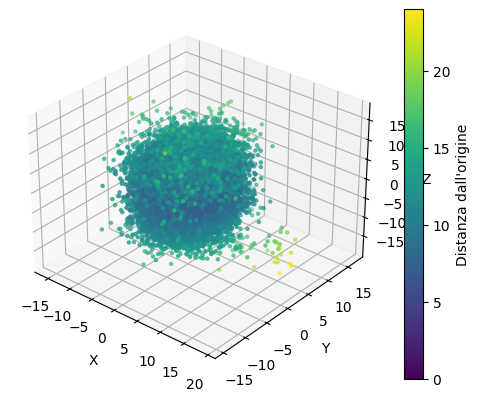

In [28]:
# Calcola la distanza dall'origine per ogni punto
distances = np.sqrt(X**2 + Y**2 + Z**2)

# Crea una figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotta i punti
sc = ax.scatter(X, Y, Z, c=distances, cmap='viridis', marker='.')

# Etichette degli assi
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Aggiungi una barra del colore per mostrare la scala delle distanze
cbar = fig.colorbar(sc)
cbar.set_label('Distanza dall\'origine')

# Inclina la visuale di 30 gradi sull'asse z
ax.view_init(elev=30, azim=-50)

# Mostra il grafico
plt.show()


Per mostrare meglio la distribuzione creatasi, di seguito viene creato un video nella quale l'orientazione della camera cambia, permettendo di avere una visuale 3D del cluster di posizioni. Si può notare meglio che le posizioni sono accumulate maggiormente ai lobi sull'asse $z$ del cluster; infatti, al centro sono più visibili posizioni di colore blu, ovvero vicine all'origine, e se sono visibili è perché la densità di posizioni più esterne che le coprono è inferiore. (di seguito viene caricato il video già renderizzato, il codice è in fondo).

In [31]:
from IPython.display import Video

video_square_path = './camera_rotation.mp4'
Video(video_square_path, embed=True)

C:\Users\teote\AppData\Local\Temp\ipykernel_13756\1364581793.py:36: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  img = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)


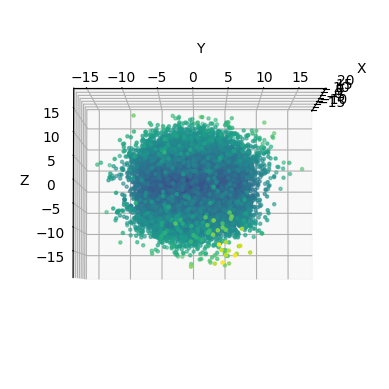

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Funzione per creare il grafico 3D
def create_3d_plot(X, Y, Z, dist):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X, Y, Z, c=dist, cmap='viridis', marker='.')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    return fig, ax

# Calcola la distanza dall'origine per ogni punto
distances = np.sqrt(X**2 + Y**2 + Z**2)

# Crea il grafico 3D iniziale
fig, ax = create_3d_plot(X, Y, Z, distances)

# Aggiungi una barra del colore per mostrare la scala delle distanze
cbar = fig.colorbar(sc)
cbar.set_label('Distanza dall\'origine')

# Parametri per la rotazione della camera
elevation_steps = 120 
azimuth_steps = 1
frames_per_rotation = 10

# Crea una lista di figure che rappresentano la rotazione della camera
rotation_figures = []
for elev in np.linspace(0, 360, elevation_steps, endpoint=False):
    for azim in np.linspace(0, 360, azimuth_steps, endpoint=False):
        ax.view_init(elev, azim)
        fig.canvas.draw()
        img = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
        img = img.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        rotation_figures.append(img)

# Crea il video
import imageio
video_filename = 'camera_rotation.mp4'
imageio.mimsave(video_filename, rotation_figures, fps=frames_per_rotation)

# Mostra il grafico 3D iniziale
plt.show()

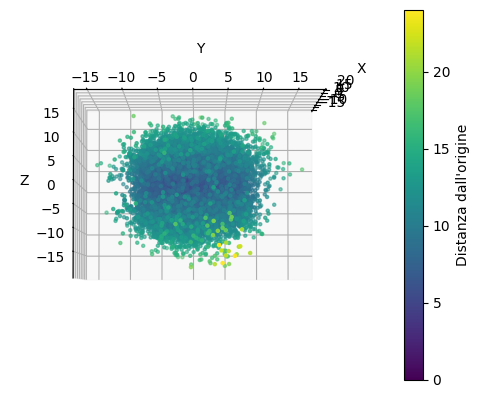

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import imageio

# Funzione per creare il grafico 3D
def create_3d_plot(X, Y, Z, dist):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(X, Y, Z, c=dist, cmap='viridis', marker='.')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    return fig, ax, sc

# Calcola la distanza dall'origine per ogni punto
distances = np.sqrt(X**2 + Y**2 + Z**2)

# Crea il grafico 3D iniziale
fig, ax, sc = create_3d_plot(X, Y, Z, distances)

# Aggiungi una barra del colore per mostrare la scala delle distanze
cbar = fig.colorbar(sc)
cbar.set_label('Distanza dall\'origine')

# Parametri per la rotazione della camera
elevation_steps = 120 
azimuth_steps = 1
frames_per_rotation = 10

# Crea una lista di figure che rappresentano la rotazione della camera
rotation_figures = []
for elev in np.linspace(0, 360, elevation_steps, endpoint=False):
    for azim in np.linspace(0, 360, azimuth_steps, endpoint=False):
        ax.view_init(elev, azim)
        fig.canvas.draw()
        
        # Cattura l'immagine come un numpy array
        img = np.array(fig.canvas.renderer.buffer_rgba())
        
        # Converti l'immagine RGBA in RGB
        img_rgb = img[:, :, :3]
        
        # Aggiungi l'immagine alla lista delle figure di rotazione
        rotation_figures.append(img_rgb)

# Crea il video
video_filename = 'camera_rotation_new.mp4'
imageio.mimsave(video_filename, rotation_figures, fps=frames_per_rotation)

# Mostra il grafico 3D iniziale
plt.show()



In [33]:
from IPython.display import Video

video_square_path = './camera_rotation_new.mp4'
Video(video_square_path, embed=True)